In [29]:
hex_colours = ["ccd5ae", "e9edc9", "fefae0", "faedcd", "d4a373"]
colours = []
for colour in hex_colours:
    colours.append(tuple(round(int(colour[i:i+2], 16)/255, 2) for i in (0, 2, 4)))

print(colours)

[(0.8, 0.84, 0.68), (0.91, 0.93, 0.79), (1.0, 0.98, 0.88), (0.98, 0.93, 0.8), (0.83, 0.64, 0.45)]


In [4]:
alphabet = ["a", "b", "c", "d", "e"]

alphabet.append(*["f", "g"])

print(alphabet)

TypeError: list.append() takes exactly one argument (2 given)

In [5]:
import random as rn


class TreeNode():
    def __init__(self, parent, value: float, children: dict) -> None:
        self.parent: TreeNode = parent
        self.value = value
        self.children = children

    def add_children(self, children):
        if type(children) == list:
            for i, child in enumerate(children):
                self.children.append(child)
                child.value = self.value + 1 + i
                child.parent = self
        elif type(children) == TreeNode:
            self.children.append(children)
            children.parent = self

    def create_child(self, count = 1):
        for i in range(1, count+1):
            new_child =  TreeNode(self, rn.randint(0, 999), [])
            self.children.append(new_child)

    def __str__(self, prefix='', is_tail=True):
        '''
        https://chatgpt.com/share/672b2844-8b58-800e-a063-2f483f16694b
        '''
        ret = prefix + ('└── ' if is_tail else '├── ') + str(self.value) + '\n'
        for i, child in enumerate(self.children):
            is_last = i == (len(self.children) - 1)
            new_prefix = prefix + ('    ' if is_tail else '│   ')
            ret += child.__str__(new_prefix, is_last)
        return ret


class Tree():
    def __init__(self):
        self.root = TreeNode(None, 0, [])

    def __str__(self):
        return self.root.__str__()

    def traverse_tree(self):
        all_nodes = []
        open = []
        closed = set()
        open.append(self.root)
        while len(open) > 0:
            current_node = open.pop()
            all_nodes.append(current_node)
            closed.add(current_node)

            for child in current_node.children:
                open.append(child)
        return all_nodes

def setup_random_tree(node, probability = 1):
    if probability < 0.1:
        return
    for i in range(3):
        if rn.random() < probability:
            node.create_child()
            for child in node.children:
                setup_random_tree(child, probability=probability*0.3)


tree = Tree()
setup_random_tree(tree.root)

print(tree)

└── 0
    ├── 536
    │   ├── 585
    │   ├── 201
    │   └── 165
    ├── 217
    │   ├── 947
    │   └── 626
    └── 649



In [ ]:
all_nodes = tree.traverse_tree()
print(all_nodes)


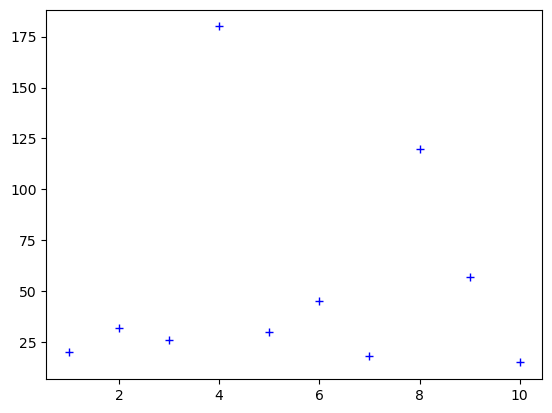

In [207]:
time = [1,2,3,4,5,6,7,8,9,10]
price = [20,32,26,180,30,45,18,120,57,15]

import matplotlib.pyplot as plt

plt.plot(time, price, "b+")